# PROYECTO FINAL MACHINE LEARNING

Por: Nicolas Javier Carreño Perea (2253404) & Emmanuel Mosquera Casas (2250881)

El dataset contiene 18 problemas de clasificación. Cada una de las variables de etiqueta independientes contiene siete clases: "Nunca usó", "Usó hace más de una década", "Usó en la última década", "Usó en el último año", "Usó en el último mes", "Usó en la última semana" y "Usó en el último día".

El problema puede transformarse en una clasificación binaria mediante la unión de parte de las clases en una nueva clase. Por ejemplo, "Nunca usado", "Usado hace más de una década" forman la clase "No usuario" y todas las demás clases forman la clase "Usuario".


## 1. Librerias e importacion del dataset

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
import matplotlib.pyplot as plt                         #libreria para generar graficos
import seaborn as sns

In [ ]:
names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
df_drugs = pd.read_csv("/content/drug_consumption.csv", names = names)
df_drugs.head()

ID      Age   Gender  Education  ...  Mushrooms  Nicotine  Semeron  VSA
0   1  0.49788  0.48246   -0.05921  ...        CL0       CL2      CL0  CL0
1   2 -0.07854 -0.48246    1.98437  ...        CL0       CL4      CL0  CL0
2   3  0.49788 -0.48246   -0.05921  ...        CL1       CL0      CL0  CL0
3   4 -0.95197  0.48246    1.16365  ...        CL0       CL2      CL0  CL0
4   5  0.49788  0.48246    1.98437  ...        CL2       CL2      CL0  CL0

[5 rows x 32 columns]

In [ ]:
df_drugs.count()

ID                   1885
Age                  1885
Gender               1885
Education            1885
Country              1885
Ethnicity            1885
Neuroticism          1885
Extraversion         1885
Openness             1885
Agreeableness        1885
Conscientiousness    1885
Impulsiveness        1885
Sensation_seeking    1885
Amphetamine          1885
Amyl_nitrite         1885
Benzodiazepine       1885
Cannabis             1885
Cocaine              1885
Crack                1885
Ecstasy              1885
Heroin               1885
Ketamine             1885
Legal_highs          1885
LSD                  1885
Methadone            1885
Mushrooms            1885
Semeron              1885
VSA                  1885
dtype: int64

In [ ]:
print(df_drugs.info())
df_drugs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1885 non-null   int64  
 1   Age                1885 non-null   int64  
 2   Gender             1885 non-null   int64  
 3   Education          1885 non-null   int64  
 4   Country            1885 non-null   int64  
 5   Ethnicity          1885 non-null   int64  
 6   Neuroticism        1885 non-null   float64
 7   Extraversion       1885 non-null   float64
 8   Openness           1885 non-null   float64
 9   Agreeableness      1885 non-null   float64
 10  Conscientiousness  1885 non-null   float64
 11  Impulsiveness      1885 non-null   float64
 12  Sensation_seeking  1885 non-null   float64
 13  Amphetamine        1885 non-null   int64  
 14  Amyl_nitrite       1885 non-null   int64  
 15  Benzodiazepine     1885 non-null   int64  
 16  Cannabis           1885 

ID          Age  ...      Semeron          VSA
count  1885.000000  1885.000000  ...  1885.000000  1885.000000
mean    945.294960     1.345889  ...     0.000531     0.018037
std     545.167641     1.277454  ...     0.023033     0.133121
min       1.000000     0.000000  ...     0.000000     0.000000
25%     474.000000     0.000000  ...     0.000000     0.000000
50%     946.000000     1.000000  ...     0.000000     0.000000
75%    1417.000000     2.000000  ...     0.000000     0.000000
max    1888.000000     5.000000  ...     1.000000     1.000000

[8 rows x 28 columns]

## 2. Tratamiento y normalizacion de los datos

Se realiza una binarizacion de los datos, para pasar de 7 clases de frecuencia de consumo a solo dos.

In [ ]:
# 1 - Si una persona es consumidora dentro de un mes, semana o dia (CL4 -> CL6), decimos que ha consumido, es decir a = 1.
# 0 - Si una persona ha dicho que ha consumido en el resto de categorias (CL0 -> CL3), deciamos que es menos riesgosa a volver a consumir;

#CL0 Nunca usada
#CL1 Usada hace una decada
#CL2 Usada en la ultima decada
#CL3 Usada el ultimo año
#CL4 Usada el ultimo mes
#CL5 Usada la ultima semana
#CL6 Usada el ultimo dia

def change(a):
    
    if ((a == 'CL6') or (a == 'CL5') or (a == 'CL4') ):
        a = 1
    
    elif ((a == 'CL0') or (a == 'CL1') or (a == 'CL2') or (a == 'CL3')):
        a = 0
    
    return a

In [ ]:
# Applying our changes in classification of drug consumption to columns with drugs

df_drugs['Amphetamine'] =df_drugs['Amphetamine'].map(change)
df_drugs['Amyl_nitrite'] =df_drugs['Amyl_nitrite'].map(change)
df_drugs['Benzodiazepine'] =df_drugs['Benzodiazepine'].map(change)
df_drugs['Cannabis'] =df_drugs['Cannabis'].map(change)
df_drugs['Cocaine'] =df_drugs['Cocaine'].map(change)
df_drugs['Crack'] =df_drugs['Crack'].map(change)
df_drugs['Ecstasy'] =df_drugs['Ecstasy'].map(change)
df_drugs['Heroin'] =df_drugs['Heroin'].map(change)
df_drugs['Ketamine'] =df_drugs['Ketamine'].map(change)
df_drugs['LSD'] =df_drugs['LSD'].map(change)
df_drugs['Methadone'] =df_drugs['Methadone'].map(change)
df_drugs['Mushrooms'] =df_drugs['Mushrooms'].map(change)
df_drugs['Semeron'] =df_drugs['Semeron'].map(change)
df_drugs['VSA'] =df_drugs['VSA'].map(change)
df_drugs['Alcohol'] =df_drugs['Alcohol'].map(change)
df_drugs['Legal_highs'] =df_drugs['Legal_highs'].map(change)
df_drugs['Nicotine'] =df_drugs['Nicotine'].map(change)
df_drugs['Chocolate'] =df_drugs['Chocolate'].map(change)
df_drugs['Caffeine'] =df_drugs['Caffeine'].map(change)

Segun nuestro analisis, tanto la cafeina, como el chocolate, como la nicotina y el alcohol, no son calificados como drogas propiamente por la OMS a pesar de tener caracteristicas adictivas.

Por lo tanto se decidio removerlas para no interferir con el resto de drogas.

In [ ]:
df_drugs.drop(['Caffeine','Chocolate','Nicotine','Alcohol'], axis = 1, inplace = True)

In [ ]:
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1885 non-null   int64  
 1   Age                1885 non-null   float64
 2   Gender             1885 non-null   float64
 3   Education          1885 non-null   float64
 4   Country            1885 non-null   float64
 5   Ethnicity          1885 non-null   float64
 6   Neuroticism        1885 non-null   float64
 7   Extraversion       1885 non-null   float64
 8   Openness           1885 non-null   float64
 9   Agreeableness      1885 non-null   float64
 10  Conscientiousness  1885 non-null   float64
 11  Impulsiveness      1885 non-null   float64
 12  Sensation_seeking  1885 non-null   float64
 13  Amphetamine        1885 non-null   int64  
 14  Amyl_nitrite       1885 non-null   int64  
 15  Benzodiazepine     1885 non-null   int64  
 16  Cannabis           1885 

Con la siguiente funcion se cambiara el formato del float, ya que de otra manera no sera posible realizar la decodicicacion mediante comparadores logicos.

In [ ]:
def fixFloatFormat(x):
    x = float('{:.5f}'.format(x))
    return x

In [ ]:
#Decodificar la columna AGE

#'18-24' age -> 0
#'25-34' age -> 1
#'35-44' age -> 2
#'45-54' age -> 3
#'55-64' age -> 4
#'65+'   age -> 5

def changeAge(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x

df_drugs['Age'] = df_drugs['Age'].map(fixFloatFormat)
df_drugs['Age'] = df_drugs['Age'].map(changeAge)
#Convertir todos los valores de la columna Age en INT
df_drugs['Age'] = df_drugs['Age'].astype("int")

In [ ]:
#Decodificar la columna GENDER

# Femenino  -> 0
# Masculino -> 1

def changeGender(x):
    if (x == 0.48246 ):
        x = 0
    elif (x == -0.48246 ):
        x = 1
    return x

df_drugs['Gender'] = df_drugs['Gender'].map(fixFloatFormat)
df_drugs['Gender'] = df_drugs['Gender'].map(changeGender)
df_drugs['Gender'] = df_drugs['Gender'].astype("int")

In [ ]:
#Decodificar la columna EDUCATION

# Left school before 16 years                          -> 0
# Left school at 16 years                              -> 1
# Left school at 17 years                              -> 2
# Left school at 18 years                              -> 3
# Some college or university, no certificate or degree -> 4
# Professional certificate/ diploma                    -> 5
# University degree                                    -> 6
# Masters degree                                       -> 7
# Doctorate degree                                     -> 8

def changeEducation(x):
  
  if (x == -2.43591):
    x = 0
  elif (x == -1.73790):
    x = 1
  elif (x == -1.43719):
    x = 2
  elif (x == -1.22751):
    x = 3
  elif (x == -0.61113):
    x = 4
  elif (x == -0.05921):
    x = 5
  elif (x == 0.45468):
    x = 6
  elif (x == 1.16365):
    x = 7
  elif (x == 1.98437):
    x = 8
  return x

df_drugs['Education'] = df_drugs['Education'].map(fixFloatFormat)
df_drugs['Education'] = df_drugs['Education'].map(changeEducation)
df_drugs['Education'] = df_drugs['Education'].astype("int")

In [ ]:
#Decodificar la columna COUNTRY

#Australia -> 0
#Canada    -> 1
#New Zealand->2
#Other     -> 3
#Republic of Ireland ->4
#UK         ->5
#USA        ->6

def changeCountry(x):
  
  if (x == -0.09765):
    x = 0
  elif (x == 0.24923):
    x = 1
  elif (x == -0.46841):
    x = 2
  elif (x == -0.28519):
    x = 3
  elif (x == 0.21128):
    x = 4
  elif (x == 0.96082):
    x = 5
  elif (x == -0.57009):
    x = 6
  return x

df_drugs['Country'] = df_drugs['Country'].map(fixFloatFormat)
df_drugs['Country'] = df_drugs['Country'].map(changeCountry)
df_drugs['Country'] = df_drugs['Country'].astype("int")

In [ ]:
#Decodificar la columna ETHNICITY

#Asian  -> 0
#Black  -> 1
#Mixed-Black/Asian -> 2
#Mixed-White/Asian -> 3
#Mixed-White/Black -> 4
#Other             -> 5
#White             -> 6

def changeEthnicity(x):
  
  if (x == -0.50212):
    x = 0
  elif (x == -1.10702):
    x = 1
  elif (x == 1.90725):
    x = 2
  elif (x == 0.12600):
    x = 3
  elif (x == -0.22166):
    x = 4
  elif (x == 0.11440):
    x = 5
  elif (x == -0.31685):
    x = 6
  return x

df_drugs['Ethnicity'] = df_drugs['Ethnicity'].map(fixFloatFormat)
df_drugs['Ethnicity'] = df_drugs['Ethnicity'].map(changeEthnicity)
df_drugs['Ethnicity'] = df_drugs['Ethnicity'].astype("int")

In [ ]:
df_drugs.head()

ID  Age  Gender  Education  Country  ...  LSD  Methadone  Mushrooms  Semeron  VSA
0   1    2       0          5        5  ...    0          0          0        0    0
1   2    1       1          8        5  ...    0          0          0        0    0
2   3    2       1          5        5  ...    0          0          0        0    0
3   4    0       0          7        5  ...    0          0          0        0    0
4   5    2       0          8        5  ...    0          0          0        0    0

[5 rows x 28 columns]

In [ ]:
df_drugs.isnull().sum()

ID                   0
Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
Sensation_seeking    0
Amphetamine          0
Amyl_nitrite         0
Benzodiazepine       0
Cannabis             0
Cocaine              0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
Legal_highs          0
LSD                  0
Methadone            0
Mushrooms            0
Semeron              0
VSA                  0
dtype: int64

In [ ]:
demographic_columns = [
    'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
]

personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation_seeking'
]

feature_columns = demographic_columns + personality_columns

drugs_columns = [
    'Amphetamine',
    'Amyl_nitrite',
    'Benzodiazepine',
    'Cannabis',
    'Cocaine',
    'Crack',
    'Ecstasy',
    'Heroin',
    'Ketamine',
    'Legal_highs',
    'LSD',
    'Methadone',
    'Mushrooms',
    'Semeron',
    'VSA'
]

## 3. Visualizacion de datos

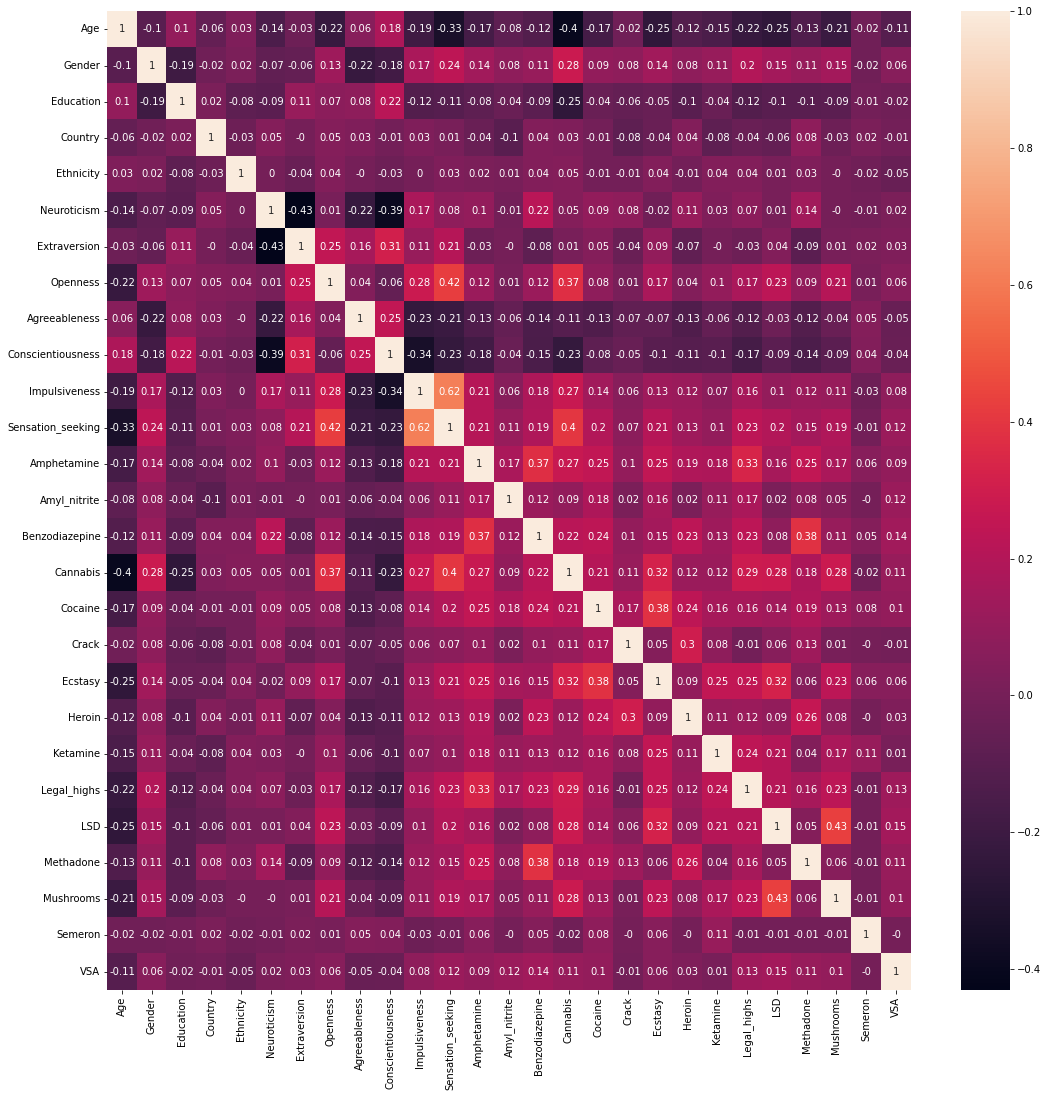

In [ ]:
plt.subplots(figsize=(18, 18))
correlation_matrix = df_drugs.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

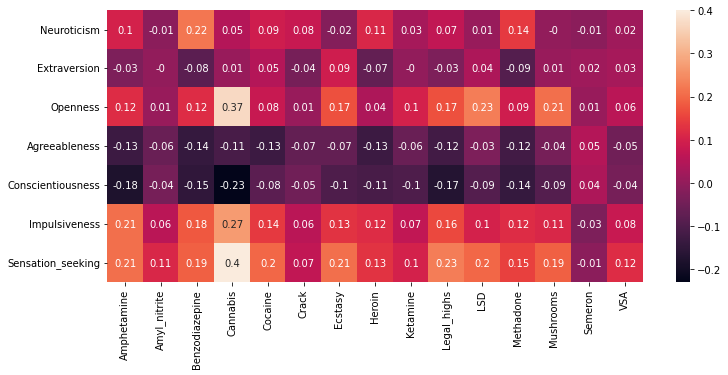

In [ ]:
plt.subplots(figsize=(12, 5))
correlation_matrix = df_drugs.corr().round(2)
correlation_matrix.drop(drugs_columns, axis=0, inplace=True)
correlation_matrix.drop(demographic_columns, axis=0, inplace=True)
correlation_matrix.drop(feature_columns, axis=1, inplace=True)
correlation_matrix.head(25)
sns.heatmap(data=correlation_matrix,annot=True)

In [ ]:
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.2]
print(strong_pairs)

Cannabis        Conscientiousness   -0.23
Mushrooms       Openness             0.21
Ecstasy         Sensation_seeking    0.21
Amphetamine     Sensation_seeking    0.21
                Impulsiveness        0.21
Benzodiazepine  Neuroticism          0.22
Legal_highs     Sensation_seeking    0.23
LSD             Openness             0.23
Cannabis        Impulsiveness        0.27
                Openness             0.37
                Sensation_seeking    0.40
dtype: float64


Como se observa, segun las correlaciones entre las variables de estudio, los efectos que mayor conllevan a las personas de estos paises a consumir son:

*   Busqueda de sensaciones (*Sensation seeking*)
*   Impulsividad (*Impulsiveness*)
*   Apertura a la experiencia (*Openness*)

A partir de esto, las sustancias que mayor influencia tienen sobre las personas consumidoras son el Cannabis, el LSD, las Legal highs o drogas legales, la Cocaina y el extasis.

Grafico de numero de personas por edad que se encuentran el dataset


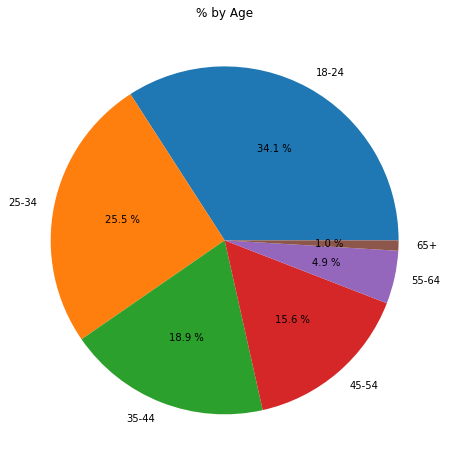

In [ ]:
plt.subplots(figsize=(10, 8))
datos = df_drugs.Age.value_counts(normalize=True,sort=False)
plt.pie(datos, labels=["18-24","25-34","35-44","45-54","55-64","65+"], autopct="%0.1f %%")
plt.title("% by Age")
plt.show()

Grafico de numero de personas por genero que se encuentran el dataset

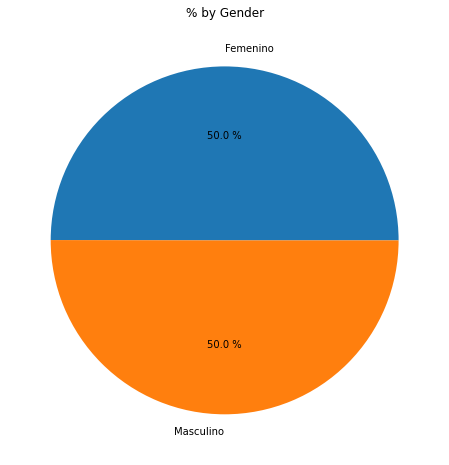

In [ ]:
plt.subplots(figsize=(10, 8))
datos = df_drugs.Gender.value_counts(normalize=True,sort=False)
plt.pie(datos, labels=["Femenino","Masculino"], autopct="%0.1f %%")
plt.title("% by Gender")
plt.show()

Grafico de numero de personas por pais que se encuentran el dataset

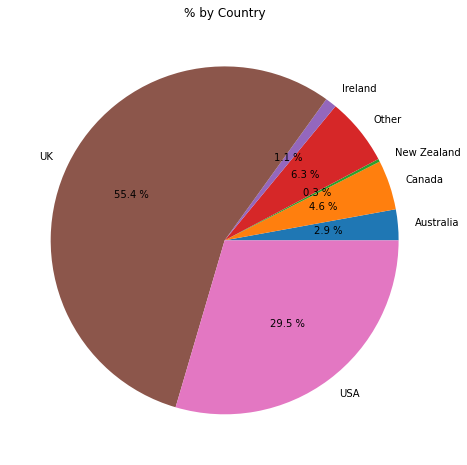

In [ ]:
plt.subplots(figsize=(10, 8))
datos = df_drugs.Country.value_counts(normalize=True,sort=False)
plt.pie(datos, labels=["Australia","Canada","New Zealand","Other","Ireland","UK","USA"], autopct="%0.1f %%")
plt.title("% by Country")
plt.show()

Grafico de numero de personas por etnia que se encuentran el dataset

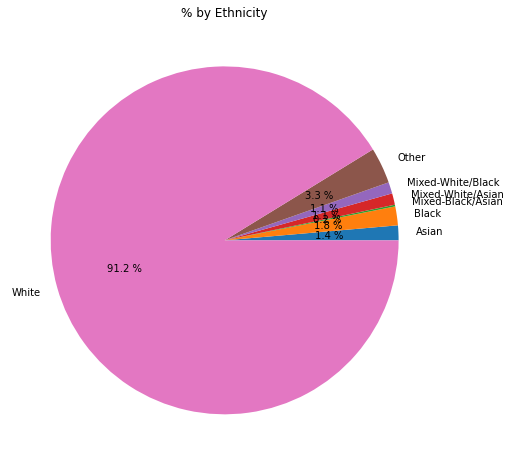

In [ ]:
plt.subplots(figsize=(10, 8))
datos = df_drugs.Ethnicity.value_counts(normalize=True,sort=False)
plt.pie(datos, labels=["Asian","Black","Mixed-Black/Asian","Mixed-White/Asian","Mixed-White/Black","Other","White"], autopct="%0.1f %%")
plt.title("% by Ethnicity")
plt.show()

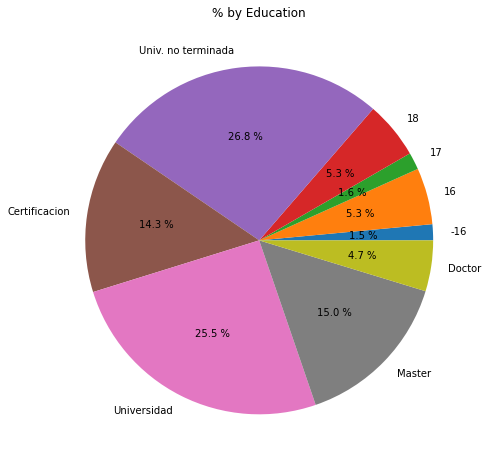

In [ ]:
plt.subplots(figsize=(10, 8))
datos = df_drugs.Education.value_counts(normalize=True,sort=False)
plt.pie(datos, labels=["-16","16","17","18","Univ. no terminada","Certificacion","Universidad","Master","Doctor"], autopct="%0.1f %%")
plt.title("% by Education")
plt.show()

Estimacion de densidad poblacional por edad y genero

Text(0.5, 1.0, 'Density estimates of dependancy between Age and Sensation seeking score')

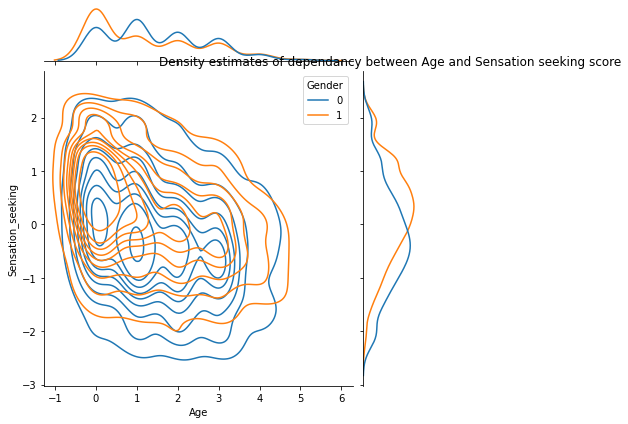

In [ ]:
# age group 0 - 18-24 ages people
# age group 1 - 25-34 ages people 

# sensation seeking 0 is average score of this test
sns.jointplot(x="Age", y="Sensation_seeking", data=df_drugs, hue="Gender",kind="kde");
plt.title('Density estimates of dependancy between Age and Sensation seeking score')

In [ ]:
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1885 non-null   int64  
 1   Neuroticism        1885 non-null   float64
 2   Extraversion       1885 non-null   float64
 3   Openness           1885 non-null   float64
 4   Agreeableness      1885 non-null   float64
 5   Conscientiousness  1885 non-null   float64
 6   Impulsiveness      1885 non-null   float64
 7   Sensation_seeking  1885 non-null   float64
 8   Amphetamine        1885 non-null   int64  
 9   Amyl_nitrite       1885 non-null   int64  
 10  Benzodiazepine     1885 non-null   int64  
 11  Cannabis           1885 non-null   int64  
 12  Cocaine            1885 non-null   int64  
 13  Crack              1885 non-null   int64  
 14  Ecstasy            1885 non-null   int64  
 15  Heroin             1885 non-null   int64  
 16  Ketamine           1885 

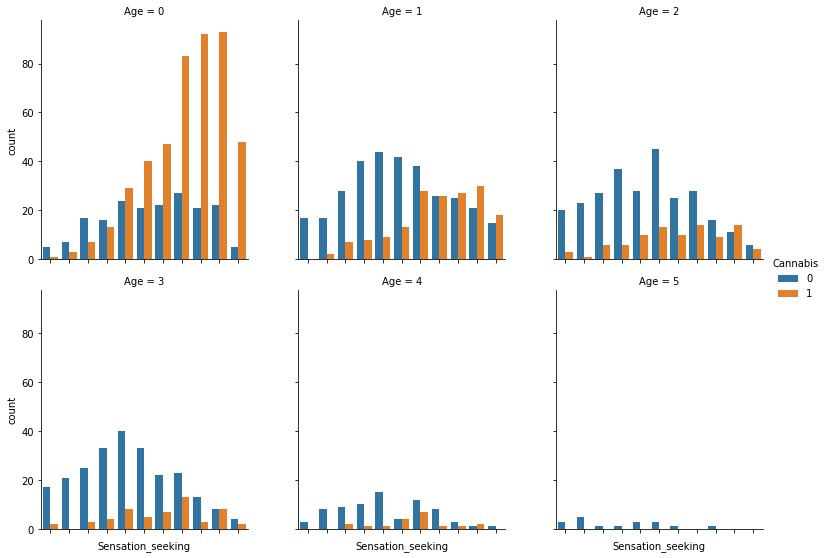

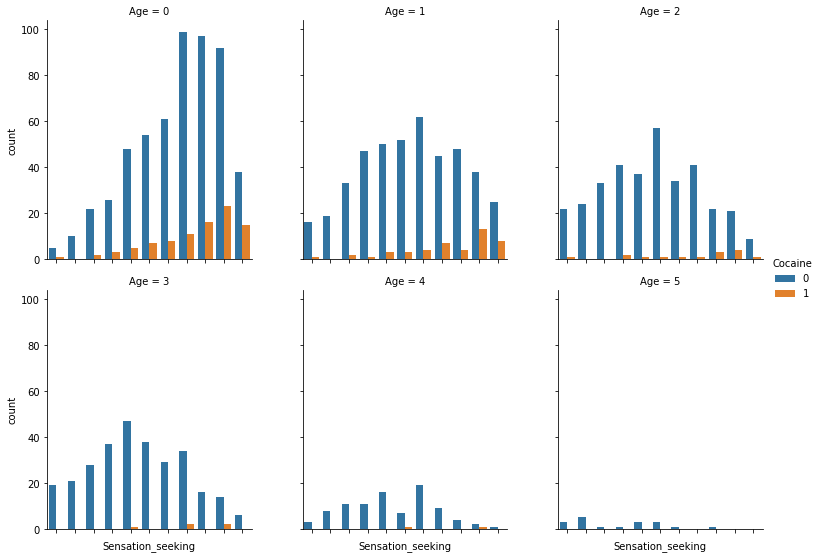

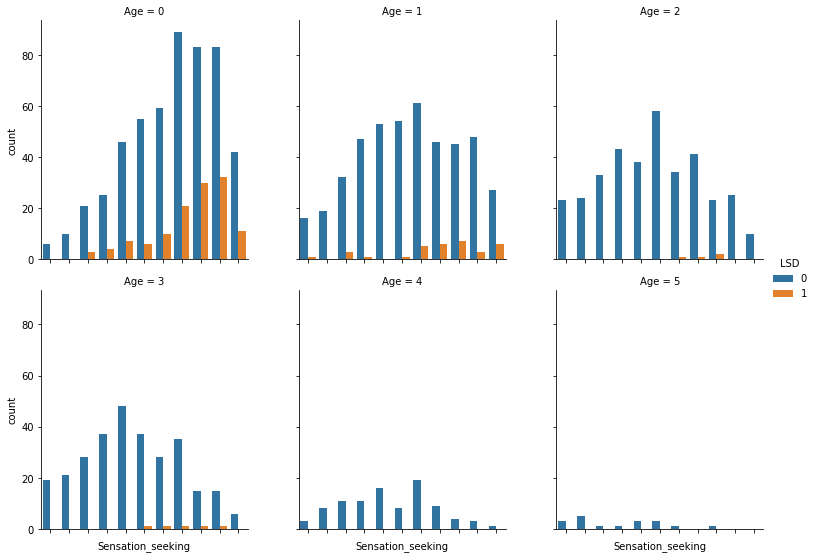

In [ ]:
g1 = sns.catplot(x="Sensation_seeking", 
                hue="Cannabis", col="Age", col_wrap=3,
                 data=df_drugs, kind="count",
                 height=4, aspect=0.9);
g1.set(xticklabels=[])

g2 = sns.catplot(x="Sensation_seeking", 
                hue="Cocaine", col="Age", col_wrap=3,
                 data=df_drugs, kind="count",
                 height=4, aspect=0.9);
g2.set(xticklabels=[])

g3 = sns.catplot(x="Sensation_seeking", 
                hue="LSD", col="Age", col_wrap=3,
                 data=df_drugs, kind="count",
                 height=4, aspect=0.9);
g3.set(xticklabels=[])

## 4. Modelos Cocaina

### Preparacion de datos de entrenamiento y de test

In [ ]:
df_drugs.drop(['ID'], axis = 1, inplace = True)

In [ ]:
#x = df_drugs[['Sensation_seeking','Impulsiveness','Openness']]
x = df_drugs[feature_columns]
y = df_drugs['Cocaine']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
x.head()

Sensation_seeking  Impulsiveness  Openness
0           -1.18084       -0.21712  -0.58331
1           -0.21575       -0.71126   1.43533
2            0.40148       -1.37983  -0.84732
3           -1.18084       -1.37983  -0.01928
4           -0.21575       -0.21712  -0.45174

### Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
logRegr.fit(x_train,y_train)
y_pred = logRegr.predict(x_test)
logRegr_score = logRegr.score(x_train,y_train).round(4)
logRegr_accu = accuracy_score(y_test,y_pred).round(4)
print("Model score: ", logRegr_score)
print("Accuracy score: ", logRegr_accu)

Model score:  0.9115
Accuracy score:  0.9216


### Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
tree_score = tree.score(x_train,y_train).round(4)
tree_accu = accuracy_score(y_test,y_pred).round(4)
print("Decision Tree Model Precission",tree_score)
print("Accuracy score: ", tree_accu)

Decision Tree Model Precission 0.9151
Accuracy score:  0.9237


Analisis de profundidad del modelo, para saber cual es la mejor profundidad a utilizar

In [ ]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,20))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  tree = DecisionTreeClassifier(max_depth=depth,random_state=0)
  tree.fit(x_train,y_train)
  score= tree.score(x_test,y_test)
  accuracy_list.append(score)

A continuacion podemos ver que valores de profundidad del arbol nos da una mejor precision de entrenamiento en el modelo.

<function matplotlib.pyplot.show>

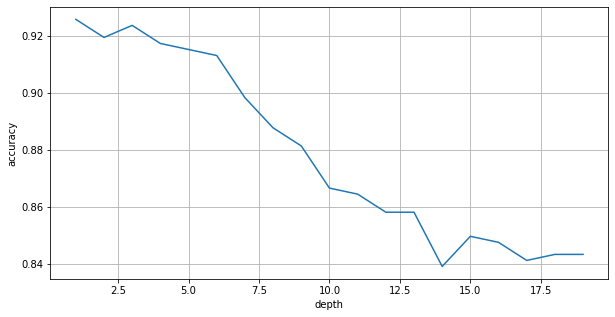

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
svc_score = svc_model.score(x_train,y_train).round(4)
svc_accu = accuracy_score(y_test,y_pred).round(4)
print("SVC Model Precission",svc_score)
print("Accuracy score: ", svc_accu)

SVC Model Precission 0.9122
Accuracy score:  0.9258


### KNN Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
knn_score = knn_model.score(x_train,y_train).round(4)
knn_accu = accuracy_score(y_test,y_pred).round(4)
print("KNN Model Precission",knn_score)
print("Accuracy score: ", knn_accu)

KNN Model Precission 0.9193
Accuracy score:  0.9174


In [ ]:
#lista de rango de neighbors (1-6)
num_neigh = list(range(1,10))
#listas de score y de accuracy
score_list=[]
accuracy_list=[]

for neighbs in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors=neighbs)
  neigh.fit(x_train,y_train)
  score= neigh.score(x_train,y_train)
  y_pred = neigh.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred)
  score_list.append(score)
  accuracy_list.append(accuracy)

<function matplotlib.pyplot.show>

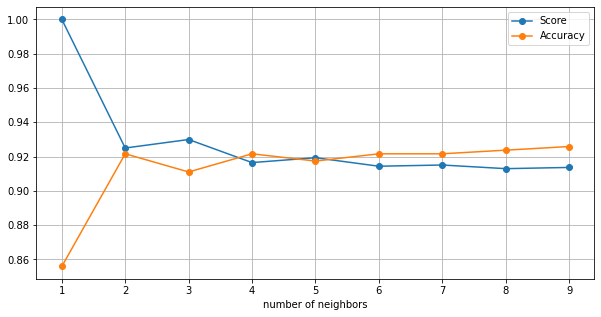

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(num_neigh, score_list,marker = 'o')
plt.plot(num_neigh, accuracy_list,marker = 'o')
plt.xlabel('number of neighbors')
plt.legend(['Score', 'Accuracy'])
plt.grid(True)
plt.show

### Resultados

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'KNN'],
    'Score': [logRegr_score, tree_score, svc_score, knn_score],
    'Accuracy': [logRegr_accu, tree_accu, svc_accu, knn_accu]
})
models.sort_values(by='Score', ascending=False)

Model   Score  Accuracy
3                     KNN  0.9193    0.9174
1           Decision Tree  0.9151    0.9237
2  Support Vector Machine  0.9122    0.9258
0     Logistic Regression  0.9115    0.9216

## 5. Modelos Cannabis

### Preparacion de datos de entrenamiento y de test

In [ ]:
#x = df_drugs[['Sensation_seeking','Impulsiveness','Openness']]
x = df_drugs[feature_columns]
y = df_drugs['Cannabis']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [ ]:
x.head()

Neuroticism  Extraversion  Openness  ...  Mushrooms  Semeron  VSA
0      0.31287      -0.57545  -0.58331  ...          0        0    0
1     -0.67825       1.93886   1.43533  ...          0        0    0
2     -0.46725       0.80523  -0.84732  ...          0        0    0
3     -0.14882      -0.80615  -0.01928  ...          0        0    0
4      0.73545      -1.63340  -0.45174  ...          0        0    0

[5 rows x 22 columns]

### Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
logRegr.fit(x_train,y_train)
y_pred = logRegr.predict(x_test)
logRegr_score = logRegr.score(x_train,y_train).round(4)
logRegr_accu = accuracy_score(y_test,y_pred).round(4)
print("Model score: ", logRegr_score)
print("Accuracy score: ", logRegr_accu)

Model score:  0.7912
Accuracy score:  0.7945


### Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
tree_score = tree.score(x_train,y_train).round(4)
tree_accu = accuracy_score(y_test,y_pred).round(4)
print("Decision Tree Model Precission",tree_score)
print("Accuracy score: ", tree_accu)

Decision Tree Model Precission 0.7771
Accuracy score:  0.7521


Analisis de profundidad del modelo, para saber cual es la mejor profundidad a utilizar

In [ ]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,20))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  tree = DecisionTreeClassifier(max_depth=depth,random_state=0)
  tree.fit(x_train,y_train)
  score= tree.score(x_test,y_test)
  accuracy_list.append(score)

A continuacion podemos ver que valores de profundidad del arbol nos da una mejor precision de entrenamiento en el modelo.

<function matplotlib.pyplot.show>

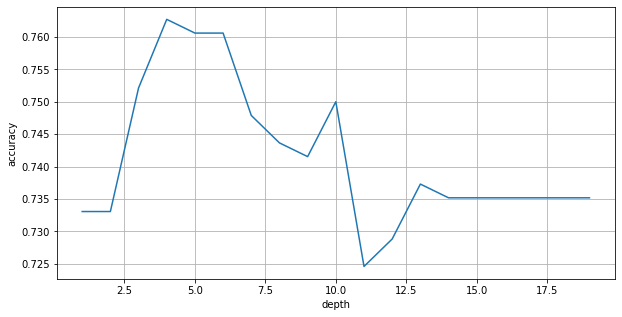

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
svc_score = svc_model.score(x_train,y_train).round(4)
svc_accu = accuracy_score(y_test,y_pred).round(4)
print("SVC Model Precission",svc_score)
print("Accuracy score: ", svc_accu)

SVC Model Precission 0.8011
Accuracy score:  0.7945


### KNN Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
knn_score = knn_model.score(x_train,y_train).round(4)
knn_accu = accuracy_score(y_test,y_pred).round(4)
print("KNN Model Precission",knn_score)
print("Accuracy score: ", knn_accu)

KNN Model Precission 0.8075
Accuracy score:  0.7669


In [ ]:
#lista de rango de neighbors (1-6)
num_neigh = list(range(1,10))
#listas de score y de accuracy
score_list=[]
accuracy_list=[]

for neighbs in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors=neighbs)
  neigh.fit(x_train,y_train)
  score= neigh.score(x_train,y_train)
  y_pred = neigh.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred)
  score_list.append(score)
  accuracy_list.append(accuracy)

<function matplotlib.pyplot.show>

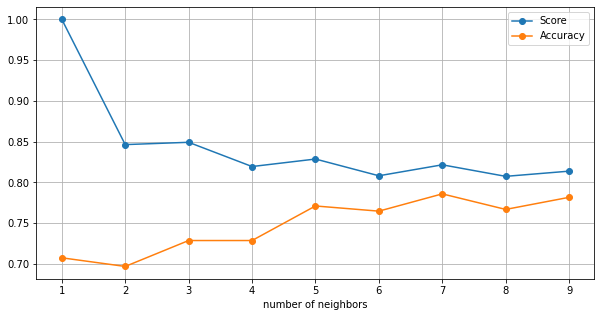

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(num_neigh, score_list,marker = 'o')
plt.plot(num_neigh, accuracy_list,marker = 'o')
plt.xlabel('number of neighbors')
plt.legend(['Score', 'Accuracy'])
plt.grid(True)
plt.show

### Resultados

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'KNN'],
    'Score': [logRegr_score, tree_score, svc_score, knn_score],
    'Accuracy': [logRegr_accu, tree_accu, svc_accu, knn_accu]
})
models.sort_values(by='Score', ascending=False)

Model   Score  Accuracy
3                     KNN  0.8075    0.7669
2  Support Vector Machine  0.8011    0.7945
0     Logistic Regression  0.7912    0.7945
1           Decision Tree  0.7771    0.7521

## 6. Modelos LSD

### Preparacion de datos de entrenamiento y de test

In [ ]:
#x = df_drugs[['Sensation_seeking','Impulsiveness','Openness']]
x = df_drugs[feature_columns]
y = df_drugs['LSD']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
logRegr.fit(x_train,y_train)
y_pred = logRegr.predict(x_test)
logRegr_score = logRegr.score(x_train,y_train).round(4)
logRegr_accu = accuracy_score(y_test,y_pred).round(4)
print("Model score: ", logRegr_score)
print("Accuracy score: ", logRegr_accu)

Model score:  0.9094
Accuracy score:  0.9195


### Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
tree_score = tree.score(x_train,y_train).round(4)
tree_accu = accuracy_score(y_test,y_pred).round(4)
print("Decision Tree Model Precission",tree_score)
print("Accuracy score: ", tree_accu)

Decision Tree Model Precission 0.925
Accuracy score:  0.9195


Analisis de profundidad del modelo, para saber cual es la mejor profundidad a utilizar

In [ ]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,20))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  tree = DecisionTreeClassifier(max_depth=depth)
  tree.fit(x_train,y_train)
  score= tree.score(x_test,y_test)
  accuracy_list.append(score)

A continuacion podemos ver que valores de profundidad del arbol nos da una mejor precision de entrenamiento en el modelo.

<function matplotlib.pyplot.show>

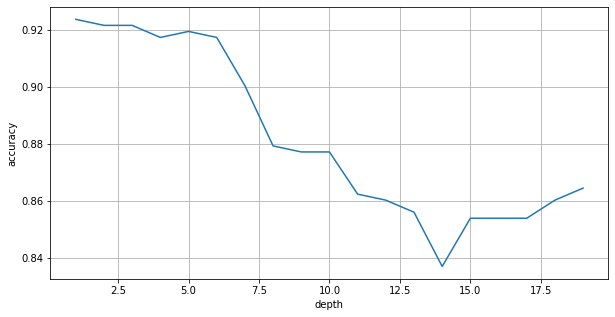

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
svc_score = svc_model.score(x_train,y_train).round(4)
svc_accu = accuracy_score(y_test,y_pred).round(4)
print("SVC Model Precission",svc_score)
print("Accuracy score: ", svc_accu)

SVC Model Precission 0.908
Accuracy score:  0.9237


### KNN Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
knn_score = knn_model.score(x_train,y_train).round(4)
knn_accu = accuracy_score(y_test,y_pred).round(4)
print("KNN Model Precission",knn_score)
print("Accuracy score: ", knn_accu)

KNN Model Precission 0.9108
Accuracy score:  0.9237


In [ ]:
#lista de rango de neighbors (1-6)
num_neigh = list(range(1,10))
#listas de score y de accuracy
score_list=[]
accuracy_list=[]

for neighbs in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors=neighbs)
  neigh.fit(x_train,y_train)
  score= neigh.score(x_train,y_train)
  y_pred = neigh.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred)
  score_list.append(score)
  accuracy_list.append(accuracy)

<function matplotlib.pyplot.show>

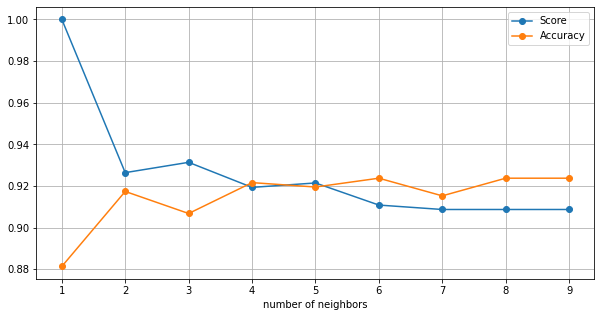

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(num_neigh, score_list,marker = 'o')
plt.plot(num_neigh, accuracy_list,marker = 'o')
plt.xlabel('number of neighbors')
plt.legend(['Score', 'Accuracy'])
plt.grid(True)
plt.show

### Resultados

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'KNN'],
    'Score': [logRegr_score, tree_score, svc_score, knn_score],
    'Accuracy': [logRegr_accu, tree_accu, svc_accu, knn_accu]
})
models.sort_values(by='Score', ascending=False)

Model   Score  Accuracy
1           Decision Tree  0.9250    0.9195
3                     KNN  0.9108    0.9237
0     Logistic Regression  0.9094    0.9195
2  Support Vector Machine  0.9080    0.9237

## 7. Modelos Extasis

### Preparacion de datos de entrenamiento y de test

In [ ]:
#x = df_drugs[feature_columns]
x = df_drugs[['Sensation_seeking','Impulsiveness','Openness']]
y = df_drugs['Ecstasy']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
logRegr.fit(x_train,y_train)
y_pred = logRegr.predict(x_test)
logRegr_score = logRegr.score(x_train,y_train).round(4)
logRegr_accu = accuracy_score(y_test,y_pred).round(4)
print("Model score: ", logRegr_score)
print("Accuracy score: ", logRegr_accu)

Model score:  0.8613
Accuracy score:  0.9004


### Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
tree_score = tree.score(x_train,y_train).round(4)
tree_accu = accuracy_score(y_test,y_pred).round(4)
print("Decision Tree Model Precission",tree_score)
print("Accuracy score: ", tree_accu)

Decision Tree Model Precission 0.8627
Accuracy score:  0.9025


Analisis de profundidad del modelo, para saber cual es la mejor profundidad a utilizar

In [ ]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,20))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  tree = DecisionTreeClassifier(max_depth=depth,random_state=0)
  tree.fit(x_train,y_train)
  score= tree.score(x_test,y_test)
  accuracy_list.append(score)

A continuacion podemos ver que valores de profundidad del arbol nos da una mejor precision de entrenamiento en el modelo.

<function matplotlib.pyplot.show>

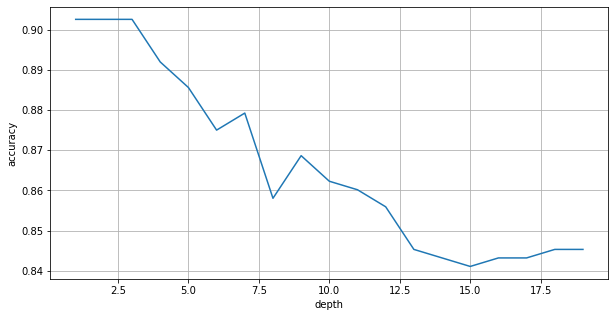

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
svc_score = svc_model.score(x_train,y_train).round(4)
svc_accu = accuracy_score(y_test,y_pred).round(4)
print("SVC Model Precission",svc_score)
print("Accuracy score: ", svc_accu)

SVC Model Precission 0.8627
Accuracy score:  0.9025


### KNN Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
knn_score = knn_model.score(x_train,y_train).round(4)
knn_accu = accuracy_score(y_test,y_pred).round(4)
print("KNN Model Precission",knn_score)
print("Accuracy score: ", knn_accu)

KNN Model Precission 0.874
Accuracy score:  0.8729


In [ ]:
#lista de rango de neighbors (1-6)
num_neigh = list(range(1,10))
#listas de score y de accuracy
score_list=[]
accuracy_list=[]

for neighbs in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors=neighbs)
  neigh.fit(x_train,y_train)
  score= neigh.score(x_train,y_train)
  y_pred = neigh.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred)
  score_list.append(score)
  accuracy_list.append(accuracy)

<function matplotlib.pyplot.show>

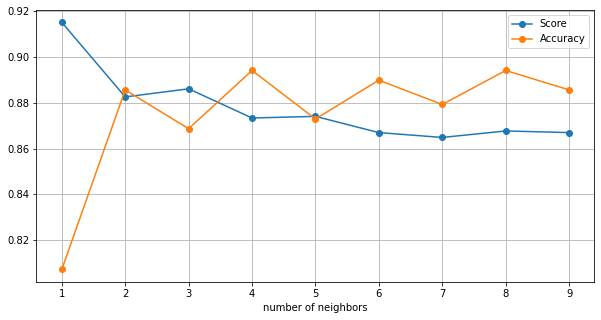

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(num_neigh, score_list,marker = 'o')
plt.plot(num_neigh, accuracy_list,marker = 'o')
plt.xlabel('number of neighbors')
plt.legend(['Score', 'Accuracy'])
plt.grid(True)
plt.show

### Resultados

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'KNN'],
    'Score': [logRegr_score, tree_score, svc_score, knn_score],
    'Accuracy': [logRegr_accu, tree_accu, svc_accu, knn_accu]
})
models.sort_values(by='Score', ascending=False)

Model   Score  Accuracy
3                     KNN  0.8740    0.8729
1           Decision Tree  0.8627    0.9025
2  Support Vector Machine  0.8627    0.9025
0     Logistic Regression  0.8613    0.9004

## 8. Modelos Drogas Legales

### Preparacion de datos de entrenamiento y de test

In [ ]:
#x = df_drugs[['Sensation_seeking','Impulsiveness','Openness']]
x= df_drugs[feature_columns]
y = df_drugs['Legal_highs']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
logRegr.fit(x_train,y_train)
y_pred = logRegr.predict(x_test)
logRegr_score = logRegr.score(x_train,y_train).round(4)
logRegr_accu = accuracy_score(y_test,y_pred).round(4)
print("Model score: ", logRegr_score)
print("Accuracy score: ", logRegr_accu)

Model score:  0.8655
Accuracy score:  0.8814


### Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
tree_score = tree.score(x_train,y_train).round(4)
tree_accu = accuracy_score(y_test,y_pred).round(4)
print("Decision Tree Model Precission",tree_score)
print("Accuracy score: ", tree_accu)

Decision Tree Model Precission 0.8719
Accuracy score:  0.8771


Analisis de profundidad del modelo, para saber cual es la mejor profundidad a utilizar

In [ ]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,20))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  tree = DecisionTreeClassifier(max_depth=depth)
  tree.fit(x_train,y_train)
  score= tree.score(x_test,y_test)
  accuracy_list.append(score)

A continuacion podemos ver que valores de profundidad del arbol nos da una mejor precision de entrenamiento en el modelo.

<function matplotlib.pyplot.show>

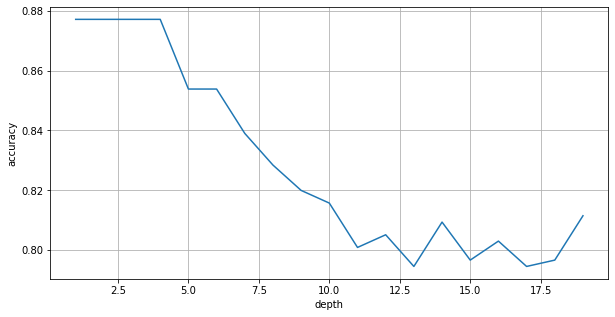

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
svc_score = svc_model.score(x_train,y_train).round(4)
svc_accu = accuracy_score(y_test,y_pred).round(4)
print("SVC Model Precission",svc_score)
print("Accuracy score: ", svc_accu)

SVC Model Precission 0.8705
Accuracy score:  0.8771


### KNN Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
knn_score = knn_model.score(x_train,y_train).round(4)
knn_accu = accuracy_score(y_test,y_pred).round(4)
print("KNN Model Precission",knn_score)
print("Accuracy score: ", knn_accu)

KNN Model Precission 0.8896
Accuracy score:  0.875


In [ ]:
#lista de rango de neighbors (1-6)
num_neigh = list(range(1,10))
#listas de score y de accuracy
score_list=[]
accuracy_list=[]

for neighbs in num_neigh:
  neigh = KNeighborsClassifier(n_neighbors=neighbs)
  neigh.fit(x_train,y_train)
  score= neigh.score(x_train,y_train)
  y_pred = neigh.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred)
  score_list.append(score)
  accuracy_list.append(accuracy)

<function matplotlib.pyplot.show>

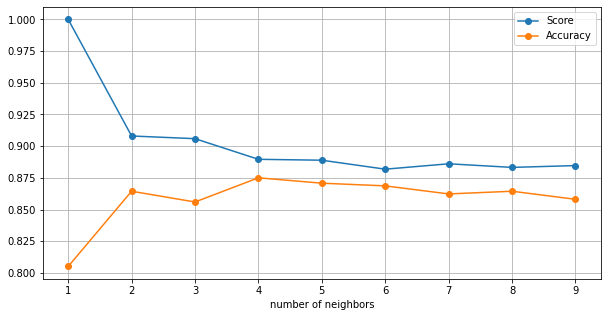

In [ ]:
plt.subplots(figsize=(10, 5))
plt.plot(num_neigh, score_list,marker = 'o')
plt.plot(num_neigh, accuracy_list,marker = 'o')
plt.xlabel('number of neighbors')
plt.legend(['Score', 'Accuracy'])
plt.grid(True)
plt.show

### Resultados

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'KNN'],
    'Score': [logRegr_score, tree_score, svc_score, knn_score],
    'Accuracy': [logRegr_accu, tree_accu, svc_accu, knn_accu]
})
models.sort_values(by='Score', ascending=False)

Model   Score  Accuracy
3                     KNN  0.8896    0.8750
1           Decision Tree  0.8719    0.8771
2  Support Vector Machine  0.8705    0.8771
0     Logistic Regression  0.8655    0.8814